In [1]:
import napari, os, glob
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

%matplotlib notebook

# Load images

In [2]:
downsize = 1

In [4]:
img_folders = [
    [
     os.path.join('Y:\\',os.sep,'Kerim_Anlas/gastruloid_imaging/tracking_preprocess/preprocess',
                  '20211110_ESLmix_48h_firstTex_probnochi/Pos3_best_reg_g/mKO2_reg'),#_tophat_gauss'),
     os.path.join('Y:\\',os.sep,'Kerim_Anlas/gastruloid_imaging/tracking_preprocess/preprocess',
                  '20211110_ESLmix_48h_firstTex_probnochi/Pos3_best_reg_g/GFP_reg'),
    ],
    [
     os.path.join('Y:\\',os.sep,'Kerim_Anlas/gastruloid_imaging/tracking_preprocess/preprocess',
                  '20211110_ESLmix_48h_firstTex_probnochi/Pos3_best_reg_g/mKO2_reg1'),
     os.path.join('Y:\\',os.sep,'Kerim_Anlas/gastruloid_imaging/tracking_preprocess/preprocess',
                  '20211110_ESLmix_48h_firstTex_probnochi/Pos3_best_reg_g/GFP_reg'),
    ],
    [
     os.path.join('Y:\\',os.sep,'Kerim_Anlas/gastruloid_imaging/tracking_preprocess/preprocess',
                 '2021_PD_72h/20210429_pos3_72h_reg_g/mKO2_reg'),#_tophat_gauss'),
     os.path.join('Y:\\',os.sep,'Kerim_Anlas/gastruloid_imaging/tracking_preprocess/preprocess',
                 '2021_PD_72h/20210429_pos3_72h_reg_g/GFP_reg'),
    ],
    [
     os.path.join('Y:\\',os.sep,'Kerim_Anlas/gastruloid_imaging/tracking_preprocess/preprocess',
                 '20220204_a2imix_96h_LC/Pos3_reg_g/mKO2_reg'),#_tophat_gauss'),
     os.path.join('Y:\\',os.sep,'Kerim_Anlas/gastruloid_imaging/tracking_preprocess/preprocess',
                 '20220204_a2imix_96h_LC/Pos3_reg_g/GFP_reg'),
    ],
    [
     os.path.join('Y:\\',os.sep,'Kerim_Anlas/gastruloid_imaging/tracking_preprocess/preprocess',
                 '2021_PD_72h/20210429_pos3_72h_reg_g/mKO2'),
     os.path.join('Y:\\',os.sep,'Kerim_Anlas/gastruloid_imaging/tracking_preprocess/preprocess',
                 '2021_PD_72h/20210429_pos3_72h_reg_g/GFP'),
    ]
]
tgmm_folders = [
    os.path.join('Y:\\',os.sep,
                 'Kerim_Anlas/gastruloid_imaging/tracking_preprocess',
                 'TGMM_results/GMEMtracking3D_2022_2_7_ESL_48h'),
    os.path.join('Y:\\',os.sep,
                 'Kerim_Anlas/gastruloid_imaging/tracking_preprocess',
                 'TGMM_results/GMEMtracking3D_2022_2_11_ESL_48h_lin'),
    os.path.join('Y:\\',os.sep,
                 'Kerim_Anlas/gastruloid_imaging/tracking_preprocess',
                 'TGMM_results/GMEMtracking3D_2022_2_7_PD_72h'),
    os.path.join('Y:\\',os.sep,
                 'Kerim_Anlas/gastruloid_imaging/tracking_preprocess',
                 'TGMM_results/GMEMtracking3D_2022_2_7_a2i_96h'),
    os.path.join('Y:\\',os.sep,
                 'Kerim_Anlas/gastruloid_imaging/tracking_preprocess',
                 'TGMM_results/GMEMtracking3D_2022_2_8_PD_72h_noreg'),
    ]

img_folder = img_folders[1][0]
tgmm_folder = tgmm_folders[1]

flist = glob.glob(os.path.join(img_folder,'*.tif'))
flist.sort()

# flist = flist[21:120]

img0 = imread(flist[0])
shape = img0.shape
new_shape = (shape[0], shape[1]//downsize, shape[2]//downsize)


In [5]:
len(flist), shape, new_shape

(200, (86, 936, 990), (86, 936, 990))

<IPython.core.display.Javascript object>


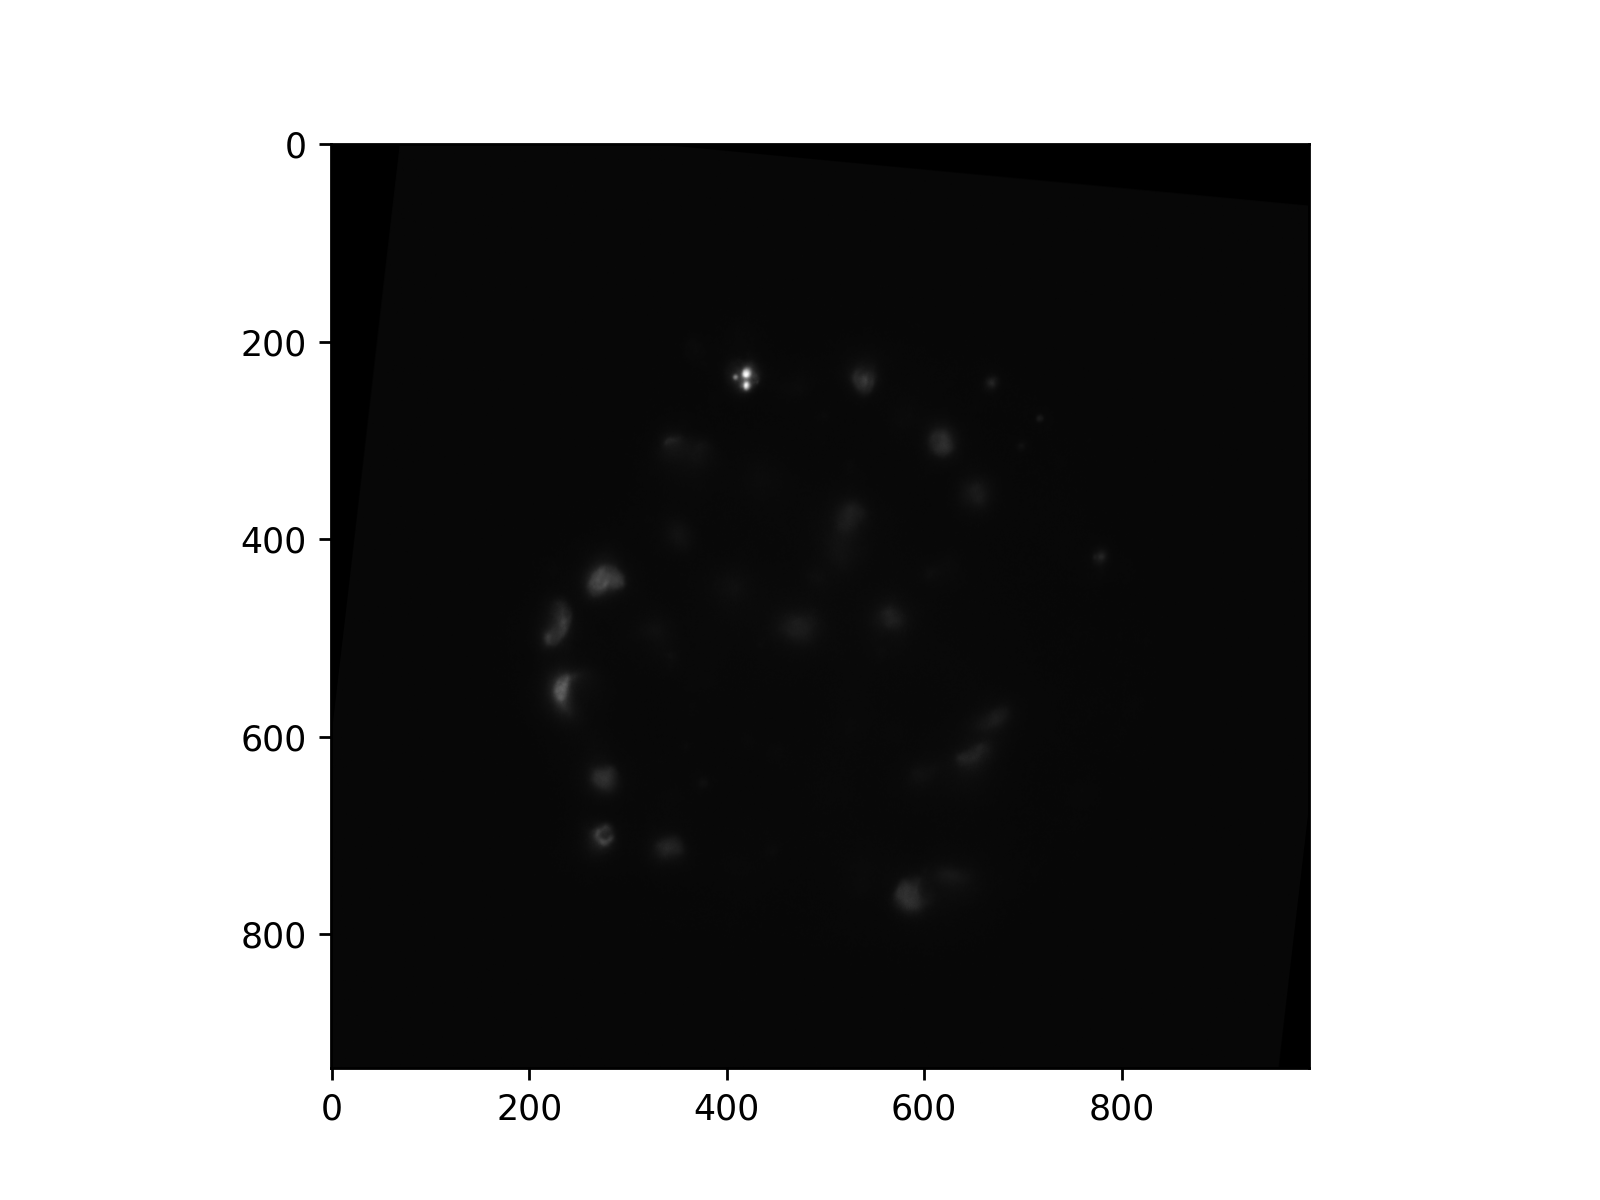

In [6]:
plt.imshow(img0[shape[0]//2],cmap='gray')

# Visualize the first timepoint and the cells detected

In [7]:
img = imread(flist[50])
scale = (5.78,1,1)

In [8]:
df = pd.read_csv(os.path.join(tgmm_folder, 'tracks.csv'))
df0 = df[df.tp==50]
df0.z *= scale[0]

C:\Users\gritti\.conda\envs\nicola\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
viewer = napari.Viewer()
viewer.add_image(img, scale=scale, name='gastruloid')
viewer.add_points(df0[['z','y','x']].to_numpy(), size=20, name='cells', face_color='red')
napari.run()

In [10]:
if downsize!=1:
    imgs = [resize(imread(f), new_shape, preserve_range=True, anti_aliasing=False, order=0) for f in tqdm(flist)]
else:
    imgs = [imread(f) for f in tqdm(flist)]
imgs = np.array(imgs)

  0%|          | 0/200 [00:00<?, ?it/s]

In [11]:
scale = (5.78,1*downsize,1*downsize)

# Load tracks

In [12]:
df = pd.read_csv(os.path.join(tgmm_folder, 'tracks_withFluo.csv'))
df.z *= scale[0]
# df.x /= downsize
# df.y /= downsize


In [13]:
df.head()

ID  tp  lineage  parent        x        y           z svIdx  splitScore  \
0   0   0        0      -1  259.587  556.318  404.854320    2            0   
1   1   0        1      -1  285.117  559.990  426.507356    3            0   
2   2   0        2      -1  289.714  508.227  469.525006    4            0   
3   3   0        3      -1  324.095  514.013  452.610992    5            0   
4   4   0        4      -1  671.134  518.529  436.207352    7            0   

   cell_id  mother_id  lineage_id        mKO2         GFP  
0        0         -1           0  790.350657  152.881027  
1        1         -1           1  379.402891  153.708360  
2        2         -1           2  285.323474  143.501573  
3        3         -1           3  251.858074  146.632151  
4        4         -1           4  689.089477  163.247007

In [ ]:
# filter out low quality tracks

lineages = set(df.lineage_id)
    
df1 = pd.DataFrame({})

for lineage in tqdm(lineages, total = len(lineages)):
    df_l = df[df.lineage_id==lineage]
    cell_ids = set(df_l.cell_id)
    
    remove_lineage = False
    for cell_id in cell_ids:
        df_c = df_l[df_l.cell_id==cell_id]
        displacement = df_c[['x','y','z']].to_numpy()
        displacement = np.diff(displacement,axis=0)**2
        displacement = np.sum(displacement, axis=1)
        if any(displacement>(10**3)):
            remove_lineage = True
            
    if len(df_l)<10:
        remove_lineage = True
            
    if not remove_lineage:
        df1 = pd.concat([df1,df_l], ignore_index=True)
        
#     if np.min(df_l.splitScore)<0:
#         print('bad lineage')
#     else:
#         df1 = pd.concat([df1,df_l], ignore_index=True)

In [14]:
df1 = df

In [15]:
# arrange tracks for napari

tracks = df1[['cell_id','tp','z','y','x']].to_numpy()
fluos = df1[['mKO2','GFP']].to_numpy()
vertices = tracks[:, 1:]

graph = {}
cell_ids = list(set(df1.cell_id))
for cell_id in tqdm(cell_ids):
    cell = df1[df1.cell_id==cell_id]
    mother_id = cell.mother_id.values[0]
    if (mother_id != -1)&(mother_id in cell_ids):
        graph[cell_id] = mother_id


  0%|          | 0/2109 [00:00<?, ?it/s]

In [16]:
properties = {}

properties['t'] = tracks[:,1]
properties['z'] = tracks[:,2]
properties['y'] = tracks[:,3]
properties['x'] = tracks[:,4]
properties['mKO2'] = fluos[:,0]
properties['GFP'] = fluos[:,1]
properties['id'] = tracks[:,0]
# properties['velocity'] = df[['vreg']].to_numpy()[:,0]

In [17]:
viewer = napari.Viewer()
viewer.add_image(imgs, scale=scale, name='gastruloid_tl',contrast_limits=[0,2000])
viewer.add_points(vertices, size=20, name='cells', opacity=0.3, face_color='red')
viewer.add_tracks(
                    tracks, 
                    properties=properties, 
                    graph=graph,
                    name='tracks'
                 )
napari.run()

In [ ]:
plt.figure()

df1 = df[df.cell_id==51]
t = df1[['x','y']].to_numpy()
plt.plot(t[:,0],t[:,1])

df1 = df[df.cell_id==343]
t = df1[['x','y']].to_numpy()
plt.plot(t[:,0],t[:,1])

df1 = df[df.cell_id==347]
t = df1[['x','y']].to_numpy()
plt.plot(t[:,0],t[:,1])



In [ ]:
set(df[df.mother_id!=-1].mother_id)

In [ ]:
df[df.mother_id==51]